# Chapter 11

## Setup and imports

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt

## Section 11.1

### Program 11.1

In [4]:
df1 = pd.DataFrame({
    'A': [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    'Y': [
        200, 150, 220, 110, 50, 180, 90, 170,
        170, 30, 70, 110, 80, 50, 10, 20
    ]
})

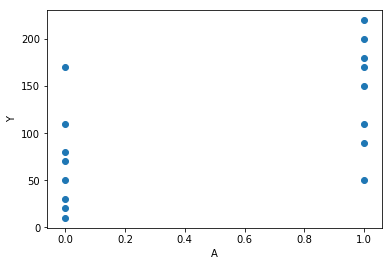

In [5]:
fig, ax = plt.subplots()

ax.scatter(df1['A'], df1['Y'])
ax.set_xlabel('A')
ax.set_ylabel('Y');

In [6]:
df1.groupby('A').describe()

Y                                                     
  count    mean        std   min    25%    50%    75%    max
A                                                           
0   8.0   67.50  53.117121  10.0   27.5   60.0   87.5  170.0
1   8.0  146.25  58.294205  50.0  105.0  160.0  185.0  220.0

"Now suppose treatment A is a polytomous variable that can take 4 possible values"

In [7]:
df2 = pd.DataFrame({
    'A': [
        1, 1, 1, 1, 2, 2, 2, 2,
        3, 3, 3, 3, 4, 4, 4, 4
    ],
    'Y': [
        110, 80, 50, 40, 170, 30, 70, 50,
        110, 50, 180, 130, 200, 150, 220, 210
    ]
})

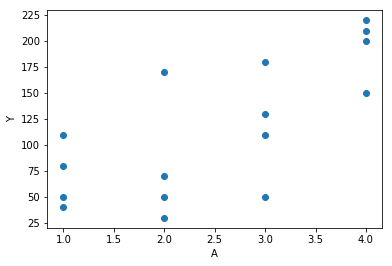

In [8]:
fig, ax = plt.subplots()

ax.scatter(df2['A'], df2['Y'])
ax.set_xlabel('A')
ax.set_ylabel('Y');

In [9]:
df2.groupby('A').describe()

Y                                                     
  count   mean        std    min    25%    50%    75%    max
A                                                           
1   4.0   70.0  31.622777   40.0   47.5   65.0   87.5  110.0
2   4.0   80.0  62.182527   30.0   45.0   60.0   95.0  170.0
3   4.0  117.5  53.774219   50.0   95.0  120.0  142.5  180.0
4   4.0  195.0  31.091264  150.0  187.5  205.0  212.5  220.0

## Section 11.2

### Program 11.2

In [10]:
A, Y = zip(*(
    (3, 21),
    (11, 54),
    (17, 33),
    (23, 101),
    (29, 85),
    (37, 65),
    (41, 157),
    (53, 120),
    (67, 111),
    (79, 200),
    (83, 140),
    (97, 220),
    (60, 230),
    (71, 217),
    (15, 11),
    (45, 190),
))

In [11]:
df3 = pd.DataFrame({'A': A, 'Y': Y, 'constant': np.ones(16)})

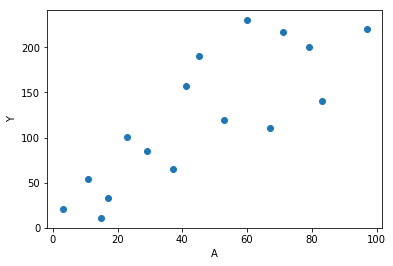

In [12]:
fig, ax = plt.subplots()

ax.scatter(df3.A, df3.Y)
ax.set_xlabel('A')
ax.set_ylabel('Y');

In [13]:
ols = sm.OLS(Y, df3[['constant', 'A']])
res = ols.fit()

In [14]:
summary = res.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
constant,24.5464,21.330,1.151,0.269,-21.202,70.295
A,2.1372,0.400,5.347,0.000,1.280,2.994


I couldn't figure out how to get confidence intervals for expected values from Statsmodels. I'll calculate them from scratch.

In [15]:
n = df3.shape[0]
yvar = (res.resid * res.resid).sum() / (n - 2)  # = res.mse_resid
xval = np.array([[1, 90]])
X = df3[['constant', 'A']]
XpXinv = np.linalg.inv(np.dot(X.T, X))
se_mean = np.sqrt(yvar * np.dot(xval, np.dot(XpXinv, xval.T)))[0, 0]

In [16]:
t = scipy.stats.t.ppf(0.975, n - 2)
ypred = res.predict([[1, 90]])[0]
print('           estimate      95% C.I.')
print(
    'E[Y|A=90]   {:>6.2f}   ({:>6.2f}, {:>6.2f})'.format(
        ypred, ypred - t * se_mean, ypred + t * se_mean
))

           estimate      95% C.I.
E[Y|A=90]   216.89   (172.15, 261.63)


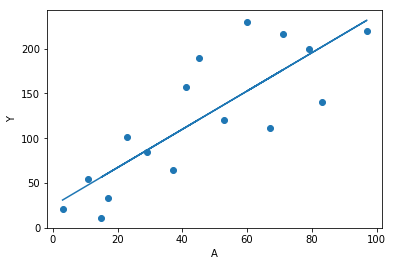

In [17]:
fig, ax = plt.subplots()

ax.scatter(df3.A, df3.Y)
ax.plot(df3.A, res.predict(df3[['constant', 'A']]))
ax.set_xlabel('A')
ax.set_ylabel('Y');

## Section 11.3

(Still Program 11.2)

"Let us return to the data in Figure 11.1."

In [18]:
df1['constant'] = 1

In [19]:
ols = sm.OLS(df1['Y'], df1[['constant', 'A']])
res = ols.fit()

In [20]:
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
constant,67.5000,19.716,3.424,0.004,25.213,109.787
A,78.7500,27.883,2.824,0.014,18.947,138.553


## Section 11.4

### Program 11.3

Starting from the same data as Section 11.2, Program 11.2

In [21]:
df3['A^2'] = df3.A * df3.A

In [22]:
ols = sm.OLS(df3.Y, df3[['constant', 'A', 'A^2']])
res = ols.fit()

In [23]:
summary = res.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
constant,-7.4069,31.748,-0.233,0.819,-75.994,61.180
A,4.1072,1.531,2.683,0.019,0.800,7.414
A^2,-0.0204,0.015,-1.331,0.206,-0.053,0.013


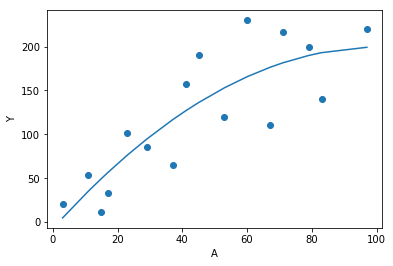

In [24]:
df3.sort_values('A', inplace=True)

fig, ax = plt.subplots()

ax.scatter(df3.A, df3.Y)
ax.plot(df3.A, res.predict(df3[['constant', 'A', 'A^2']]))
ax.set_xlabel('A')
ax.set_ylabel('Y');

In [25]:
n = df3.shape[0]
yvar = (res.resid * res.resid).sum() / (n - 2)  # = res.mse_resid
xval = np.array([[1, 90, 90 * 90]])
X = df3[['constant', 'A', 'A^2']]
XpXinv = np.linalg.inv(np.dot(X.T, X))
se_mean = np.sqrt(yvar * np.dot(xval, np.dot(XpXinv, xval.T)))[0, 0]

In [26]:
se_mean

24.246294596848763

In [27]:
t = scipy.stats.t.ppf(0.975, n - 3)
ypred = res.predict(xval)[0]
print('           estimate      95% C.I.')
print(
    'E[Y|A=90]   {:>6.2f}   ({:>6.2f}, {:>6.2f})'.format(
        ypred, ypred - t * se_mean, ypred + t * se_mean
))

           estimate      95% C.I.
E[Y|A=90]   197.13   (144.75, 249.51)


Note: This confidence interval is slightly different from what we get in the Stata code.